Bike

In [1]:
import pandas as pd

b_df = pd.read_csv('../new/bike.csv')
b_df

,Date,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [2]:
# 범주형 데이터를 제외한 데이터 프레임 생성
origin_b_df = b_df.copy()
pre_b_df = b_df.copy()
pre_b_df = pre_b_df.drop(labels = ['Date', 'Seasons','Holiday','Functioning Day'], axis=1)

In [3]:
# 타겟 컬럼 위치 변경
target_column =  pre_b_df.pop('Rented Bike Count')
pre_b_df.loc[:, 'target'] = target_column
pre_b_df

,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [43]:
pre_b_df.isna().sum()

Hour                       0
Temperature(?C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
target                     0
dtype: int64

In [45]:
pre_b_df.duplicated().sum()

0

In [4]:
# 상관관계 확인
pre_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538558
Hour                       0.410257
Dew point temperature      0.379788
Solar Radiation (MJ/m2)    0.261837
Visibility (10m)           0.199280
Wind speed (m/s)           0.121108
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Humidity(%)               -0.199780
Name: target, dtype: float64

In [5]:
# OLS 수치 확인
from statsmodels.api import OLS


features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              3042.
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        03:56:00   Log-Likelihood:                         -66330.
No. Observations:                8760   AIC:                                  1.327e+05
Df Residuals:                    8751   BIC:                                  1.327e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# Cycle01
- 별도의 추가 전처리 작업 없이 범주형 데이터만 제외 후 진행

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_negative(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))


In [9]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 208294.7827, RMSE: 456.3932, R2: 0.4893


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [11]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 140395.6319, RMSE: 374.6941, R2: 0.6558


MSE: 129704.2023, RMSE: 360.1447, R2: 0.6897


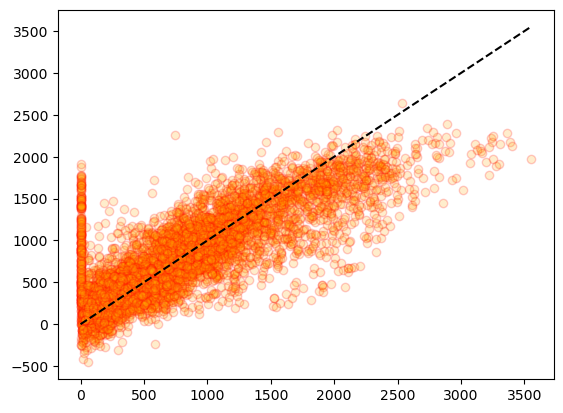

In [12]:
import matplotlib.pyplot as plt

# l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation_negative(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 140395.6319, RMSE: 374.6941, R2: 0.6558


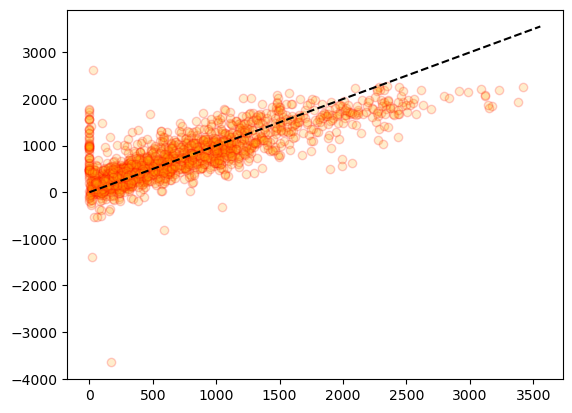

In [13]:
import matplotlib.pyplot as plt

# l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

# C01
- 비선형훈련에서 더 높은 점수를 보이고 있기 때문에 비선형 데이터 확인

# Cycle02
- 기존 범주형 데이터를 추가한 후 훈련 진행

In [14]:
origin_b_df = origin_b_df.drop(labels = ['Date','Functioning Day'], axis=1)

In [20]:
# 타겟 컬럼 위치 변경
target_column =  origin_b_df.pop('Rented Bike Count')
origin_b_df.loc[:, 'target'] = target_column
origin_b_df

,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,712


In [21]:
# 범주형 데이터 레이블인코딩
from sklearn.preprocessing import LabelEncoder

columns = ['Seasons', 'Holiday']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(origin_b_df[column])
    origin_b_df[column] = result
    label_encoders[column] = encoder.classes_

label_encoders

{'Seasons': array([0, 1, 2, 3]), 'Holiday': array([0, 1])}

In [22]:
origin_b_df

,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,712


In [23]:
# 상관관계 확인
origin_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538558
Hour                       0.410257
Dew point temperature      0.379788
Solar Radiation (MJ/m2)    0.261837
Visibility (10m)           0.199280
Wind speed (m/s)           0.121108
Holiday                    0.072338
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Humidity(%)               -0.199780
Seasons                   -0.253058
Name: target, dtype: float64

In [24]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              2574.
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        03:57:53   Log-Likelihood:                         -66217.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8749   BIC:                                  1.325e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [32]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 203459.3725, RMSE: 451.0647, R2: 0.5012


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 214191.0825, RMSE: 462.8078, R2: 0.4749


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 169793.3242, RMSE: 412.0599, R2: 0.5837
RandomForestRegressor
MSE: 82243.7990, RMSE: 286.7818, R2: 0.7984
GradientBoostingRegressor
MSE: 88344.1441, RMSE: 297.2274, R2: 0.7834
XGBRegressor
MSE: 86142.9093, RMSE: 293.5011, R2: 0.7888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60890
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 361
[LightGBM] [Info] Start training from score 707.558647
LGBMRegressor
MSE: 78478.6603, RMSE: 280.1404, R2: 0.8076


# C02
- 트리기반의 모델에서 훈련이 더 잘되는 것을 확인 할 수 있다.

# Cycle 03
- 이상치를 제거

In [46]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(origin_b_df)
std_origin_b_df = pd.DataFrame(result, columns = origin_b_df.columns)
std_origin_b_df



,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.698650
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.776175
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.824240
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.926571
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.971535
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.462661
8756,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.092095
8757,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,-0.016438
8758,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.011470


In [47]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_origin_b_df.columns:
    if std_origin_b_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_origin_b_df[column].between(-1.96, 1.96).count())
    condition &= std_origin_b_df[column].between(-1.96, 1.96)

std_origin_b_df = std_origin_b_df[condition]
std_origin_b_df


,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target
0,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.698650
1,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.776175
2,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.824240
3,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.926571
4,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,-0.971535
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.462661
8756,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.092095
8757,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,-0.016438
8758,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.011470


In [48]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
origin_b_df = origin_b_df.iloc[std_origin_b_df.index].reset_index(drop=True)
origin_b_df

,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
5998,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1003
5999,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,764
6000,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,694
6001,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,712


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [50]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 141044.1497, RMSE: 375.5585, R2: 0.4673


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [62]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 125052.8676, RMSE: 353.6281, R2: 0.5277


In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 124617.1790, RMSE: 353.0116, R2: 0.5293
RandomForestRegressor
MSE: 74844.0671, RMSE: 273.5764, R2: 0.7173
GradientBoostingRegressor
MSE: 81036.7439, RMSE: 284.6695, R2: 0.6939
XGBRegressor
MSE: 73918.3067, RMSE: 271.8792, R2: 0.7208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10650
[LightGBM] [Info] Number of data points in the train set: 4802, number of used features: 74
[LightGBM] [Info] Start training from score 625.310912
LGBMRegressor
MSE: 70040.1457, RMSE: 264.6510, R2: 0.7355


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10650
[LightGBM] [Info] Number of data points in the train set: 4802, number of used features: 74
[LightGBM] [Info] Start training from score 625.310912
MSE: 22829.3035, RMSE: 151.0937, R2: 0.9127


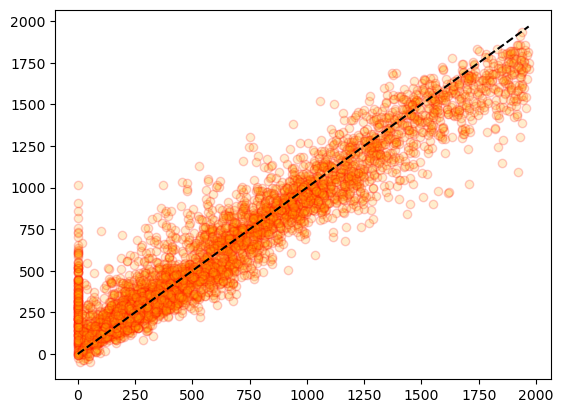

In [66]:
import matplotlib.pyplot as plt

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation_negative(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 70040.1457, RMSE: 264.6510, R2: 0.7355


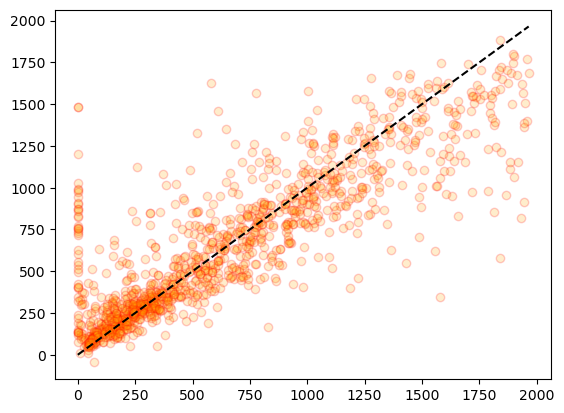

In [67]:
import matplotlib.pyplot as plt

prediction = lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# 과적합이 있을 수 있다는 판단하에 교차 검증 진행

In [80]:
# 파이프라인 구축 후 차원 축소 후 선형 회귀 분석
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler


features, targets = origin_b_df.iloc[:,:-1], origin_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=15, random_state=321, shuffle=True)

parameters = {
    'lgb_r__num_leaves': [10, 20, 30],
    'lgb_r__learning_rate': [0.05, 0.1, 0.15],
    'lgb_r__n_estimators': [50, 100, 200]
}

pipe = Pipeline(
    [
        ('std', StandardScaler()),
        ('lgb_r', LGBMRegressor(random_state=321))
    ]
)

grid_lgb = GridSearchCV(pipe, param_grid=parameters, cv=kfold, scoring='r2')
grid_lgb.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score: {:.3f}".format(-grid_lgb.best_score_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 4481, number of used features: 10
[LightGBM] [Info] Start training from score 626.688016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 4481, number of used features: 10
[LightGBM] [Info] Start training from score 623.186565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [82]:
prediction = grid_lgb.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 76263.8671, RMSE: 276.1591, R2: 0.7120


In [88]:
def r2_score(y_true, y_pred):
    SS_res = torch.sum((y_true - y_pred)**2)
    SS_tot = torch.sum((y_true - torch.mean(y_true))**2)
    r2 = 1 - (SS_res / SS_tot)
    return r2


In [89]:
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from torch.nn import Linear

torch.manual_seed(321)

features, targets = origin_b_df.iloc[:,:-1],origin_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

real_X_train, val_X_test, real_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.5, random_state=321)

real_X_train = torch.FloatTensor(X_train.values)
real_y_train = torch.FloatTensor(y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(X_test.values)
val_y_test = torch.FloatTensor(y_test.values).view(-1, 1)
l_r = Linear(real_X_train.shape[1], 1)  # 입력 차원 동적 할당
optimizer = SGD(l_r.parameters(), lr=1e-7)  # 보다 실용적인 학습률

epochs = 1000000  # 적절한 에포크 수
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    l_r.train()
    H = l_r(real_X_train)
    train_loss = mse_loss(real_y_train, H)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    l_r.eval()
    with torch.no_grad():
        H_test = l_r(val_X_test)
        test_loss = mse_loss(val_y_test, H_test)
        r2 = r2_score(val_y_test, H_test)
    
    real_train_loss_history.append(train_loss.item())
    val_test_loss_history.append(test_loss.item())

    # if epoch % 10000 == 0:
    #     print(f'{epoch}/{epochs}: ', end='')
    #     W = l_r.weight.data.squeeze()
    #     b = l_r.bias.data
    #     for i, w in enumerate(W):
    #         print(f'W{i+1}: {w:.4f}, ', end='')
    #     print(f'b: {b.item():.4f}, Loss: {train_loss.item():.4f}\n')
    if epoch % 10000 == 0:
        print(f'{epoch}/{epochs}: ', end='')
        W = l_r.weight.data.squeeze()
        b = l_r.bias.data
        for i, w in enumerate(W):
            print(f'W{i+1}: {w:.4f}, ', end='')
        print(f'b: {b.item():.4f}, Loss: {test_loss.item():.4f}\n')
        print(f'Test Loss: {test_loss.item():.4f}, R-squared: {r2.item():.4f}')


10000/1000000: W1: 3.6697, W2: 4.5700, W3: 2.2039, W4: -0.0355, W5: 0.2495, W6: 3.4389, W7: 0.1189, W8: 0.0501, W9: 0.1408, W10: -0.3236, W11: 0.2631, b: 0.0868, Loss: 227693.3438

Test Loss: 227693.3438, R-squared: 0.1400
20000/1000000: W1: 6.5887, W2: 7.5498, W3: 1.3514, W4: 0.1230, W5: 0.2322, W6: 5.1138, W7: 0.2687, W8: 0.0137, W9: 0.1386, W10: -0.4332, W11: 0.3030, b: 0.1267, Loss: 206269.5469

Test Loss: 206269.5469, R-squared: 0.2209
30000/1000000: W1: 9.1724, W2: 9.7155, W3: 0.5731, W4: 0.2709, W5: 0.2227, W6: 6.0305, W7: 0.3982, W8: -0.0225, W9: 0.1372, W10: -0.5236, W11: 0.3437, b: 0.1674, Loss: 193071.8906

Test Loss: 193071.8906, R-squared: 0.2708
40000/1000000: W1: 11.4639, W2: 11.3518, W3: -0.0012, W4: 0.4092, W5: 0.2134, W6: 6.4826, W7: 0.5122, W8: -0.0583, W9: 0.1363, W10: -0.6013, W11: 0.3853, b: 0.2091, Loss: 184397.7969

Test Loss: 184397.7969, R-squared: 0.3036
50000/1000000: W1: 13.4917, W2: 12.6240, W3: -0.4225, W4: 0.5380, W5: 0.2042, W6: 6.6352, W7: 0.6141, W8: 

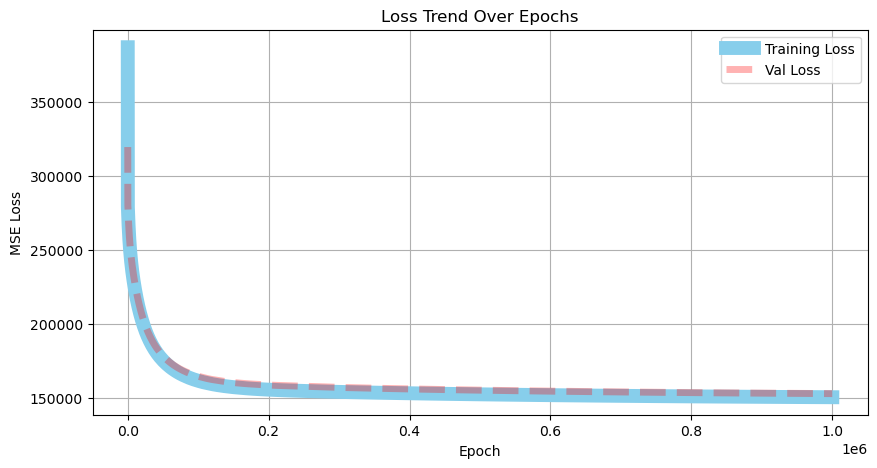

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(real_train_loss_history, label='Training Loss', linewidth=10, color= 'skyblue')
plt.plot(val_test_loss_history, label='Val Loss', linestyle='--' , linewidth=5, alpha=0.3, color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Trend Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 최종 결론
1. 교차검증 진행 시 별도의 과적합은 없는 것으로 판단되었으나, 파이토치를 이용하여 추가적인 손실값과 그래프를 확인하여,
해당 정도의 R2 Score값을 확인한 후 적절한 수치를 확인하였습니다.
2. 마지막 결론은 따로 정리가 필요